In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

### Loading Model

In [2]:
model = tf.keras.models.load_model('trained_model.keras')

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [4]:
!pip install opencv-python


   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
    --------------------------------------- 0.5/39.5 MB 2.8 MB/s eta 0:00:14
    --------------------------------------- 0.8/39.5 MB 2.2 MB/s eta 0:00:18
   - -------------------------------------- 1.3/39.5 MB 2.3 MB/s eta 0:00:17
   - -------------------------------------- 1.8/39.5 MB 2.4 MB/s eta 0:00:16
   -- ------------------------------------- 2.4/39.5 MB 2.4 MB/s eta 0:00:16
   -- ------------------------------------- 2.9/39.5 MB 2.4 MB/s eta 0:00:16
   --- ------------------------------------ 3.4/39.5 MB 2.5 MB/s eta 0:00:15
   --- ------------------------------------ 3.9/39.5 MB 2.4 MB/s eta 0:00:15
   ---- ----------------------------------- 4.5/39.5 MB 2.4 MB/s eta 0:00:15
   ----- ---------------------------------- 5.0/39.5 MB 2.5 MB/s eta 0:00:15
   ----- ---------------------------------- 5.5/39.5 MB 2.5 MB/s eta 0:00:14
   ------ --------------------------------- 6.3/39.5 MB 2.5 MB/s eta 0:00:14
   ---

### Visualizing Single Image 

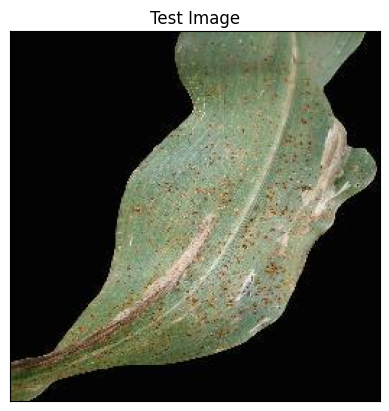

In [24]:
import cv2 
image_path = 'test/test/CornCommonRust1.JPG'   
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

### Testing Model

In [25]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
print(input_arr.shape)

(1, 128, 128, 3)


In [26]:
predictions = model.predict(input_arr)
print(predictions)
print(predictions.shape)

1/1 [==============================] - 0s 28ms/step
[[4.2218289e-17 1.7503919e-18 2.6198324e-18 9.0763717e-20 9.8240529e-19
  3.0620166e-19 5.4122906e-20 1.5477157e-13 1.0000000e+00 3.4423649e-18
  1.4643676e-16 3.9980256e-20 3.0403761e-21 4.7564200e-20 1.0121557e-20
  9.3563814e-20 1.3368645e-19 9.7035768e-24 1.6641221e-20 1.3653552e-19
  2.6008002e-13 9.7929721e-24 4.3245007e-18 6.3409611e-23 1.0278731e-24
  5.4398225e-19 4.8256409e-16 3.5461570e-24 7.0539936e-23 1.3168936e-16
  6.2904246e-09 8.3961440e-24 3.3074843e-19 4.6513128e-26 8.4094781e-24
  3.7922242e-26 1.1170697e-25 2.6719830e-18]]
(1, 38)


In [27]:
result_index = np.argmax(predictions[0])
print(result_index)

8


In [28]:
class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

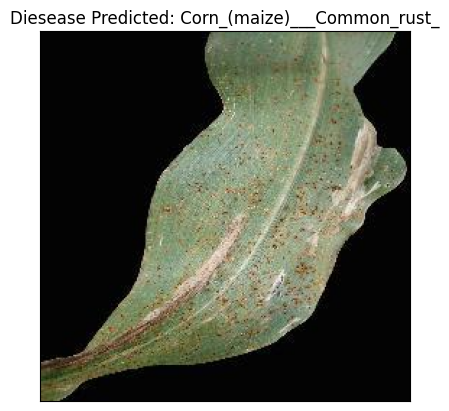

In [29]:
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f'Diesease Predicted: {model_prediction}')
plt.xticks([])
plt.yticks([])
plt.show()